**We'll do some intial EDA here to better understand the data and problem before deciding our approach**

In [56]:
### Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
### Loading datasets

train_peptides = pd.read_csv("../data/train_peptides.csv")
train_proteins = pd.read_csv("../data/train_proteins.csv")
train_clinical_data = pd.read_csv("../data/train_clinical_data.csv")
supplemental_clinical_data = pd.read_csv("../data/supplemental_clinical_data.csv")

In [58]:
### Data cleaning: removing NaNs

train_clinical_data[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_clinical_data[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(method = "bfill") # backfilling used right now, but can change later

Text(0.5, 1.0, 'Score Distribution for UPDRS Category 4')

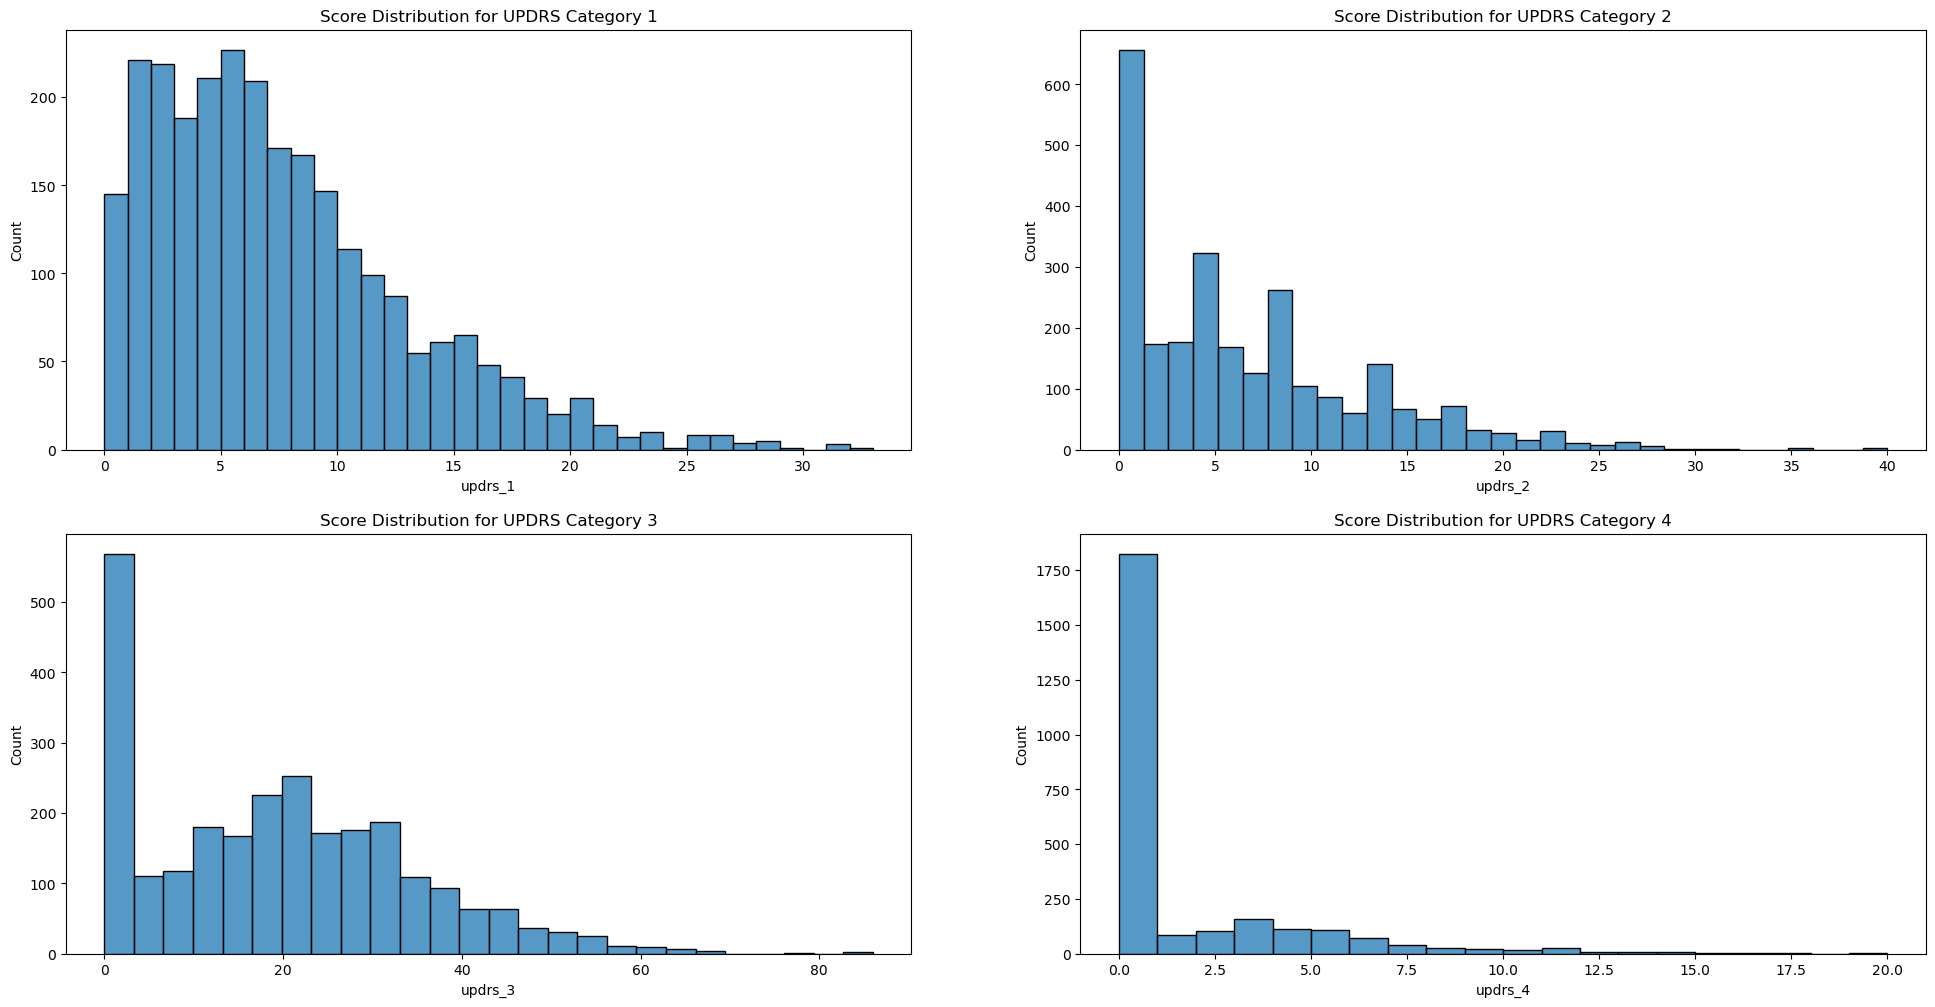

In [59]:
### Distributions of UPDRS scores by category

fig_updrs, axs_updrs = plt.subplots(2, 2, figsize=(24,12))

# updrs_1
sns.histplot(ax = axs_updrs[0, 0], data = train_clinical_data, x="updrs_1", stat="count")
axs_updrs[0, 0].set_title("Score Distribution for UPDRS Category 1")

# updrs_2
sns.histplot(ax = axs_updrs[0, 1], data = train_clinical_data, x="updrs_2", stat="count")
axs_updrs[0, 1].set_title("Score Distribution for UPDRS Category 2")

# updrs_3
sns.histplot(ax = axs_updrs[1, 0], data = train_clinical_data, x="updrs_3", stat="count")
axs_updrs[1, 0].set_title("Score Distribution for UPDRS Category 3")

# updrs_4
sns.histplot(ax = axs_updrs[1, 1], data = train_clinical_data, x="updrs_4", stat="count", binwidth=1)
axs_updrs[1, 1].set_title("Score Distribution for UPDRS Category 4")


In [60]:
### Merging train_proteins and train_peptides with train_clinical_data tables by visit_id (respectively)

proteins_score = train_proteins.merge(train_clinical_data, how = "inner")
peptides_score = train_peptides.merge(train_clinical_data, how = "inner")
